In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier


In [3]:
# Load the dataset from the CSV file
data = pd.read_csv("CIA1_Dataset.csv")

# Define features (X) and the target variable (y)
X = data[['credit_score', 'age', 'employment_years']].values
y = data['approved'].values

    # Split the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Scale the features. This is crucial for both perceptrons and neural networks
    # as it standardizes the data and helps the models converge faster.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data loading and preprocessing complete.\n")

Data loading and preprocessing complete.



In [4]:
# 1: 
class Perceptron:
    """
    A simple Single-Layer Perceptron classifier.
    """
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._step_function
        self.weights = None
        self.bias = None

    def _step_function(self, x):
        """The activation function: returns 1 if input is >= 0, otherwise 0."""
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        """Train the perceptron on the training data."""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.where(y > 0, 1, 0)

        # Iterate 
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        """Make predictions for new data."""
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

# Train and evaluate the Perceptron
print("Training the Single-Layer Perceptron...")
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train_scaled, y_train)
perceptron_predictions = perceptron.predict(X_test_scaled)
perceptron_accuracy = accuracy_score(y_test, perceptron_predictions)
print("Perceptron training complete.\n")

Training the Single-Layer Perceptron...
Perceptron training complete.



In [6]:
print("Training Classifier")
mlp = MLPClassifier(hidden_layer_sizes=(16,), activation='relu', solver='adam', max_iter=1, warm_start=True)

for epoch in range(50):
    mlp.fit(X_train_scaled, y_train)
    train_acc = mlp.score(X_train_scaled, y_train)
    val_acc = mlp.score(X_test_scaled, y_test)
    history['accuracy'].append(train_acc)
    history['val_accuracy'].append(val_acc)
nn_accuracy = mlp.score(X_test_scaled, y_test)
print("MLP training complete.\n")

Training Classifier
MLP training complete.



c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization

In [7]:

# 3.

print("--- Model Accuracy Comparison ---")
print(f"Single-Layer Perceptron Accuracy: {perceptron_accuracy * 100:.2f}%")
print(f"Feedforward Neural Network Accuracy: {nn_accuracy * 100:.2f}%")
print("---------------------------------\n")



--- Model Accuracy Comparison ---
Single-Layer Perceptron Accuracy: 95.45%
Feedforward Neural Network Accuracy: 95.45%
---------------------------------



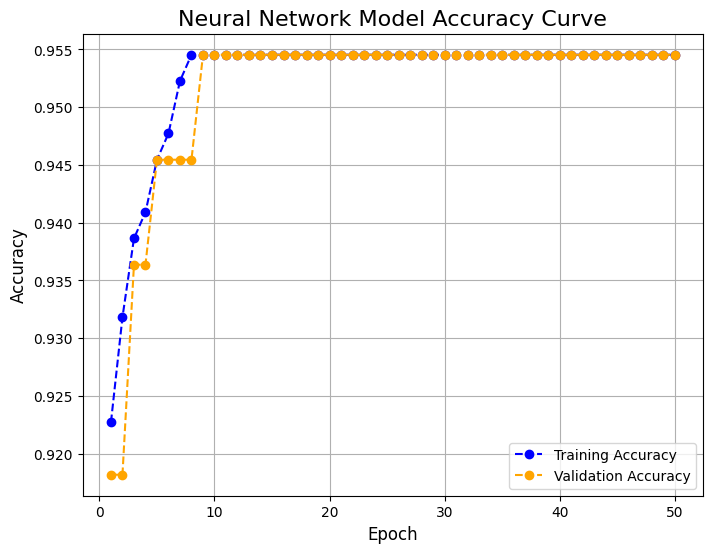

In [8]:
# 4

fig, ax = plt.subplots(figsize=(8, 6))
epochs = range(1, len(history['accuracy']) + 1)
ax.plot(epochs, history['accuracy'], label='Training Accuracy', color='blue', marker='o', linestyle='--')
ax.plot(epochs, history['val_accuracy'], label='Validation Accuracy', color='orange', marker='o', linestyle='--')
ax.set_title('Neural Network Model Accuracy Curve', fontsize=16)
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.legend(loc='lower right')
ax.grid(True)
plt.show()

The accuracy we got is the same for both the models i.e. 95.45%. However, the feedforward neural network is expected to outperform the single-layer perceptron. The reason is that a perceptron can only learn a linear decision boundary (a flat plane in this 3D feature space). 


The neural network with its hidden layer and non-linear ReLU activation function, can learn a more complex, curved decision boundary, allowing it to classify the data more accurately.